# The UCI Breast Cancer Wisconsin (Diagnostic) dataset

## Group Notice

**TLDR:**

If you just want to see the result, **ignore this**.

In case you want to re-run this notebook:

If everything seems normal, ignore this.
Otherwise, the server may be down, run the section at the end. Then ignore the import datasets section of 2.1 and run everything else as normal.

**Note:**

The process of making this notebook took quite a while, we had encountered multiple instances of the ics server dying. The last iteration has been run by the dataset in the archive.ics.uci.edu, however, if you rerun this code and find the server dying, in the end of the notebook we provide a section to take the dataset from a zip file in google drive, run that section and ignore the import datasets section of 2.1. The rest can be execute as normal.

## 2.1 Datasets preparing

### Import Datasets

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
features = breast_cancer_wisconsin_diagnostic.data.features
labels = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

print(features)

print(labels)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

### Class Distribution

#### Original Dataset

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


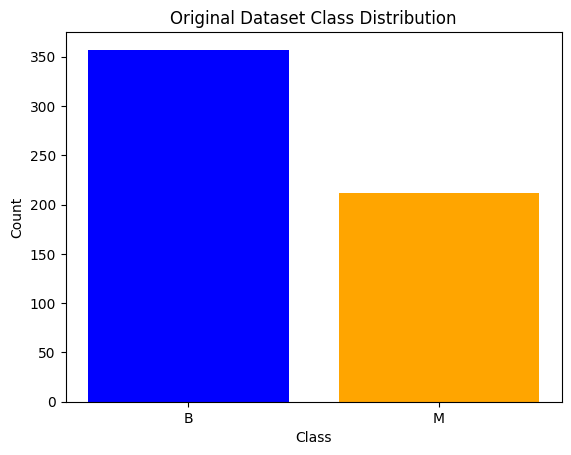

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Function to create stratified train/test splits
def create_splits(features, labels, test_sizes):
    splits = []
    for test_size in test_sizes:
        features_train, features_test, labels_train, labels_test = train_test_split(
            features, labels, test_size=test_size, stratify=labels, random_state=42
        )
        splits.append((features_train, features_test, labels_train, labels_test))
    return splits

# Define train/test proportions
test_sizes = [0.6, 0.4, 0.2, 0.1]
splits = create_splits(features, labels, test_sizes)

# Function to visualize class distributions
def plot_class_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    class_names = ['B','M']
    plt.bar(class_names, counts, color=['blue', 'orange'])
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

# Plot class distribution for the original dataset
plot_class_distribution(labels, "Original Dataset Class Distribution")

# Visualize class distributions for each train/test split
#for i, (features_train, features_test, labels_train, labels_test) in enumerate(splits):
#    proportion = f"{int((1 - test_sizes[i]) * 100)}/{int(test_sizes[i] * 100)}"
#    plot_class_distribution(labels_train, f"Training Set Class Distribution ({proportion})")
#    plot_class_distribution(labels_test, f"Test Set Class Distribution ({proportion})")


#### 40/60 Dataset

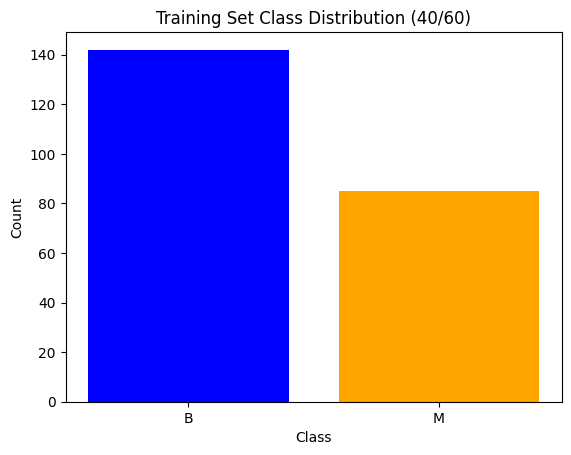

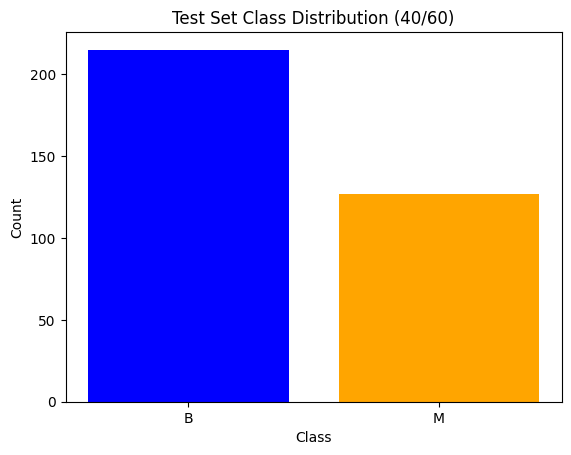

In [ ]:
i = 0
features_train, features_test, labels_train, labels_test = splits[i]
proportion = f"{int((1 - test_sizes[i]) * 100)}/{int(test_sizes[i] * 100)}"
plot_class_distribution(labels_train, f"Training Set Class Distribution ({proportion})")
plot_class_distribution(labels_test, f"Test Set Class Distribution ({proportion})")

#### 60/40 Dataset

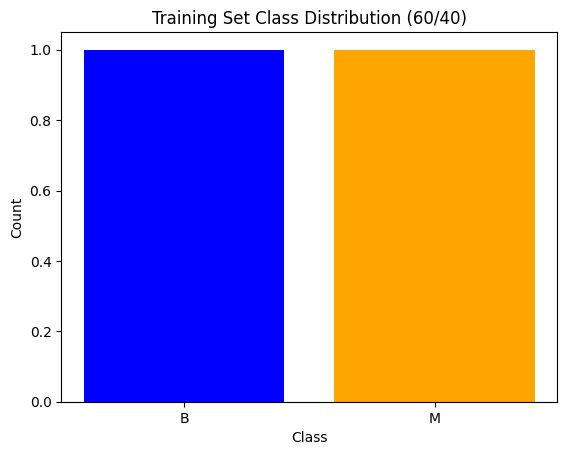

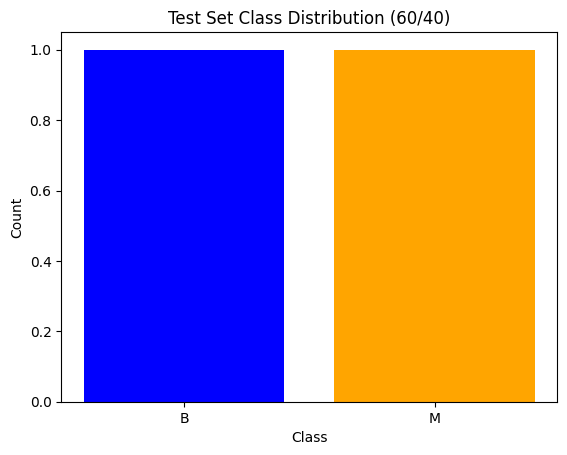

In [ ]:
i = 1
features_train, features_test, labels_train, labels_test = splits[i]
proportion = f"{int((1 - test_sizes[i]) * 100)}/{int(test_sizes[i] * 100)}"
plot_class_distribution(labels_train[i], f"Training Set Class Distribution ({proportion})")
plot_class_distribution(labels_test[i], f"Test Set Class Distribution ({proportion})")

####80/20 Dataset

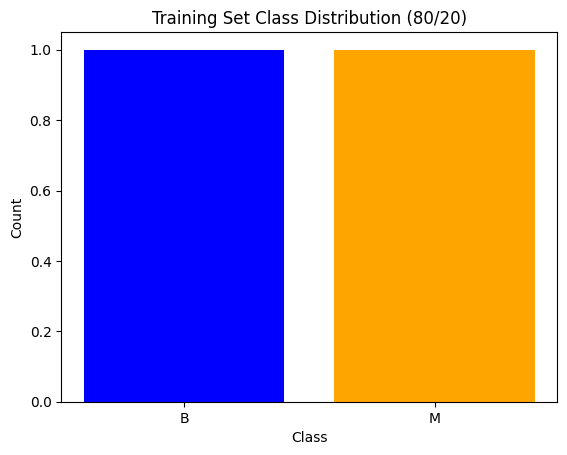

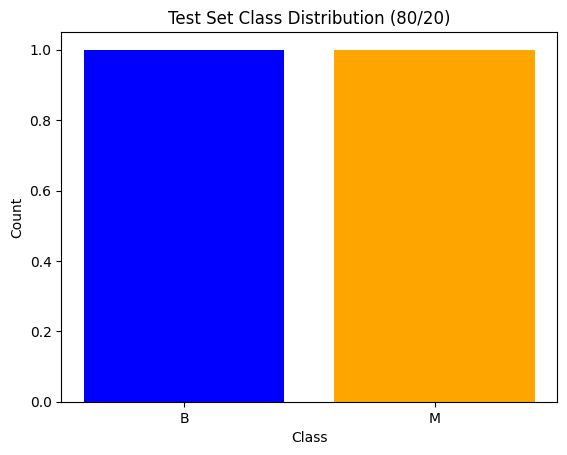

In [ ]:
i = 2
features_train, features_test, labels_train, labels_test = splits[i]
proportion = f"{int((1 - test_sizes[i]) * 100)}/{int(test_sizes[i] * 100)}"
plot_class_distribution(labels_train[i], f"Training Set Class Distribution ({proportion})")
plot_class_distribution(labels_test[i], f"Test Set Class Distribution ({proportion})")

####90/10 Dataset

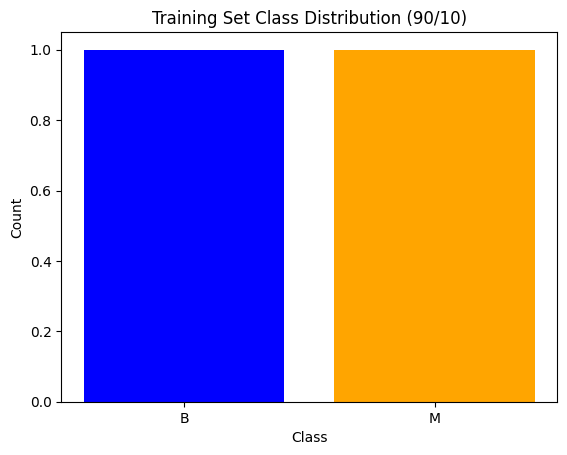

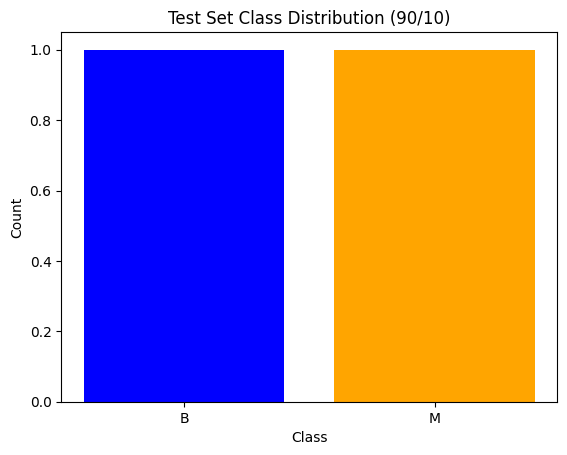

In [ ]:
i = 3
features_train, features_test, labels_train, labels_test = splits[i]
proportion = f"{int((1 - test_sizes[i]) * 100)}/{int(test_sizes[i] * 100)}"
plot_class_distribution(labels_train[i], f"Training Set Class Distribution ({proportion})")
plot_class_distribution(labels_test[i], f"Test Set Class Distribution ({proportion})")

## 2.2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import display

# Task 2.2 Implementation
def build_and_visualize_decision_trees(splits, proportions):
    classifier = []
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
        proportion = proportions[i]
        clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
        clf.fit(X_train, y_train)
        classifier.append((clf, X_train, X_test, y_train, y_test))

        # Get feature names from the training data
        feature_names = list(X_train.columns) #This line is added

        # Define class names (assuming binary classification)
        class_names = ['B', 'M'] #This line is added

        # Visualize the decision tree
        dot_data = export_graphviz(
            clf,
            feature_names=feature_names,
            class_names=class_names,
            filled=True
        )
        dot_data = export_graphviz(clf, feature_names=feature_names, class_names=class_names, filled=True)

        graph = graphviz.Source(dot_data)

        graph.render(f"decision_tree_{proportion[0]}", format="svg", cleanup=True)
        graph.render(f"decision_tree_{proportion[0]}", format="png", cleanup=True)

        # Render inline in Jupyter Notebook
        display(graph)
    return classifier

proportions = ["40/60", "60/40", "80/20", "90/10"]
classifiers = []

###40/60 Dataset

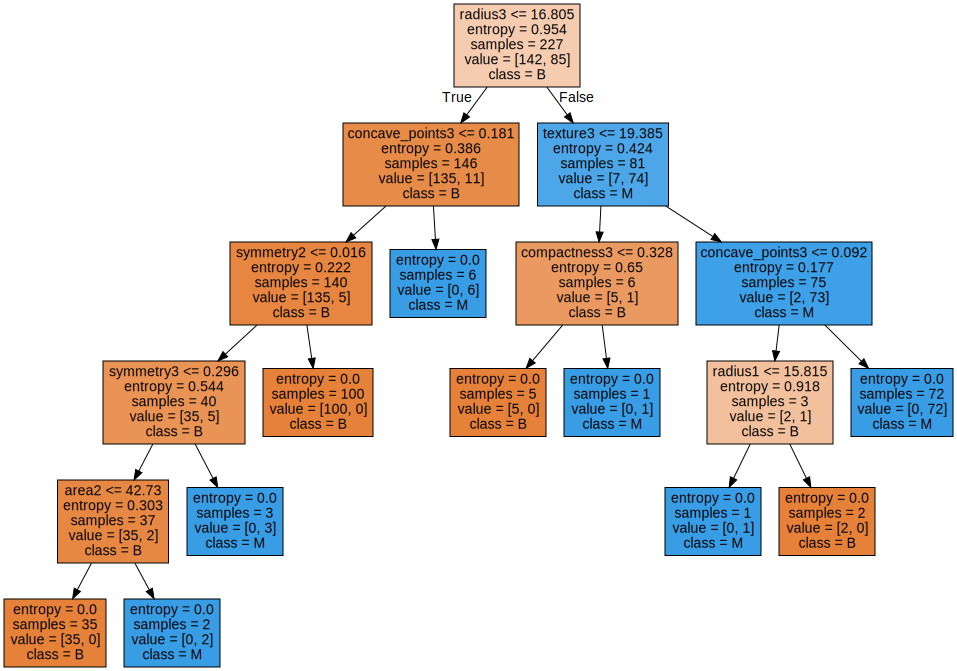

In [ ]:
i=0
classifiers.extend(build_and_visualize_decision_trees([splits[i]], [proportions[i]]))

###60/40 Dataset

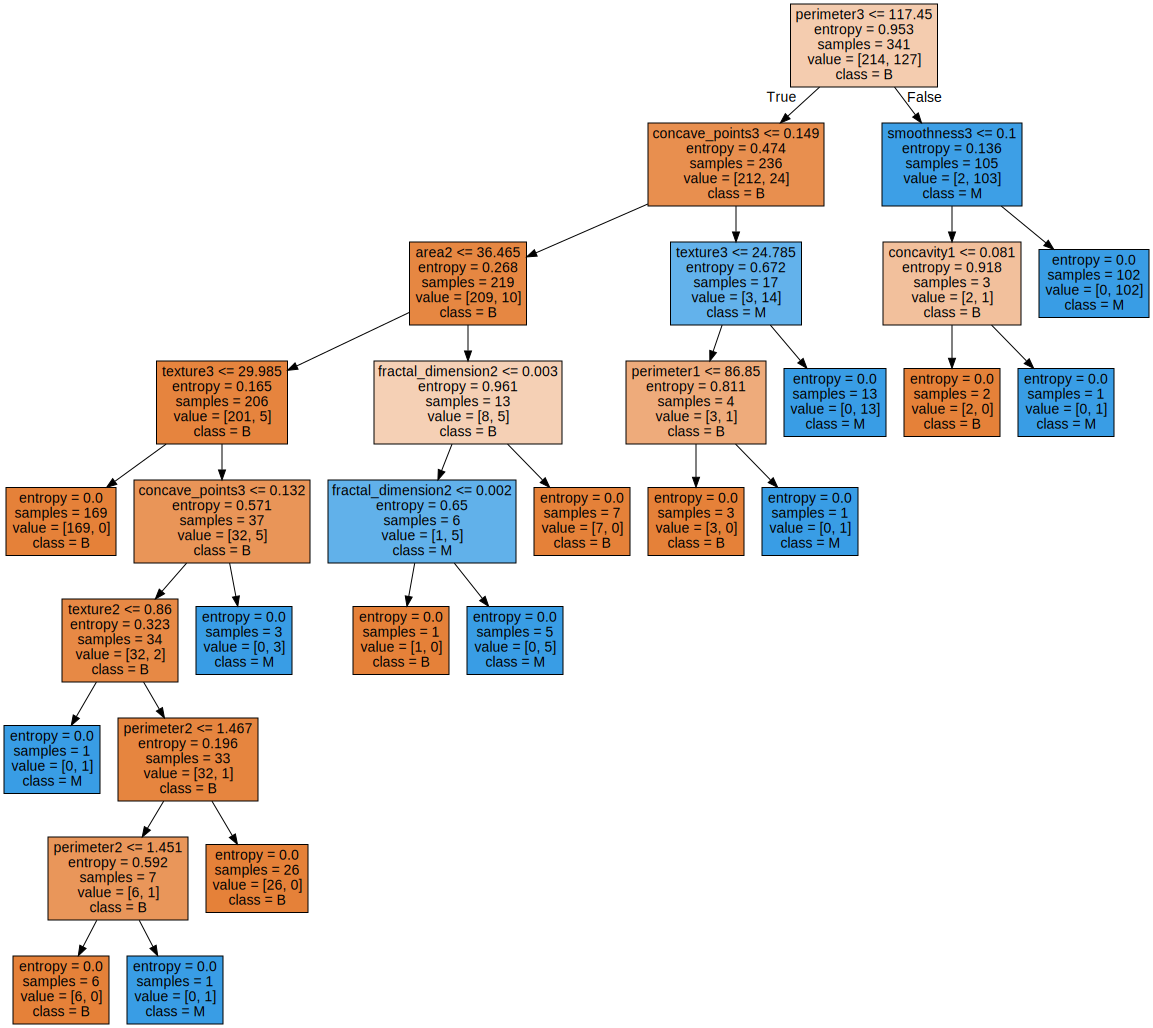

In [ ]:
i=1
classifiers.extend(build_and_visualize_decision_trees([splits[i]], [proportions[i]]))

###80/20 Dataset

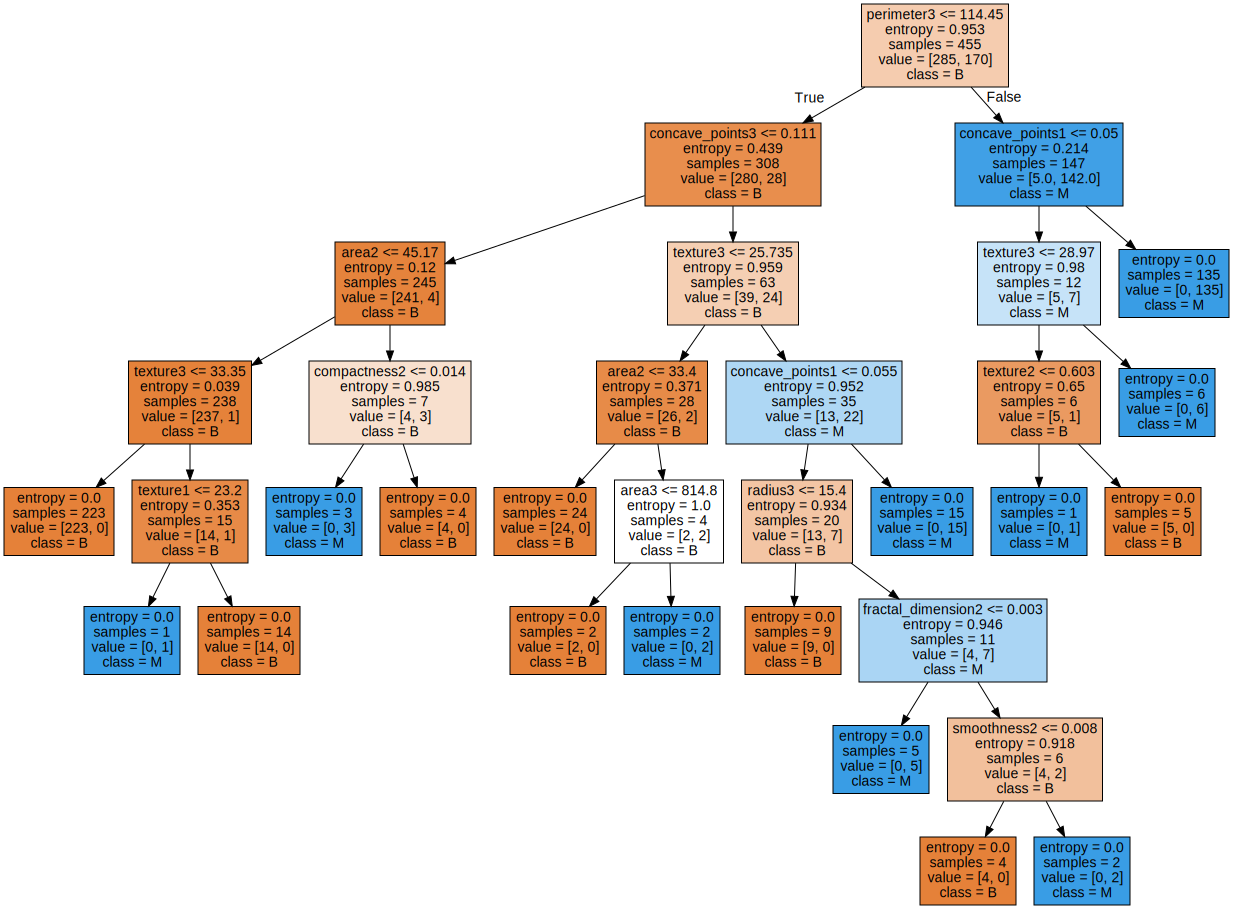

In [ ]:
i=2
classifiers.extend(build_and_visualize_decision_trees([splits[i]], [proportions[i]]))

###90/10 Dataset

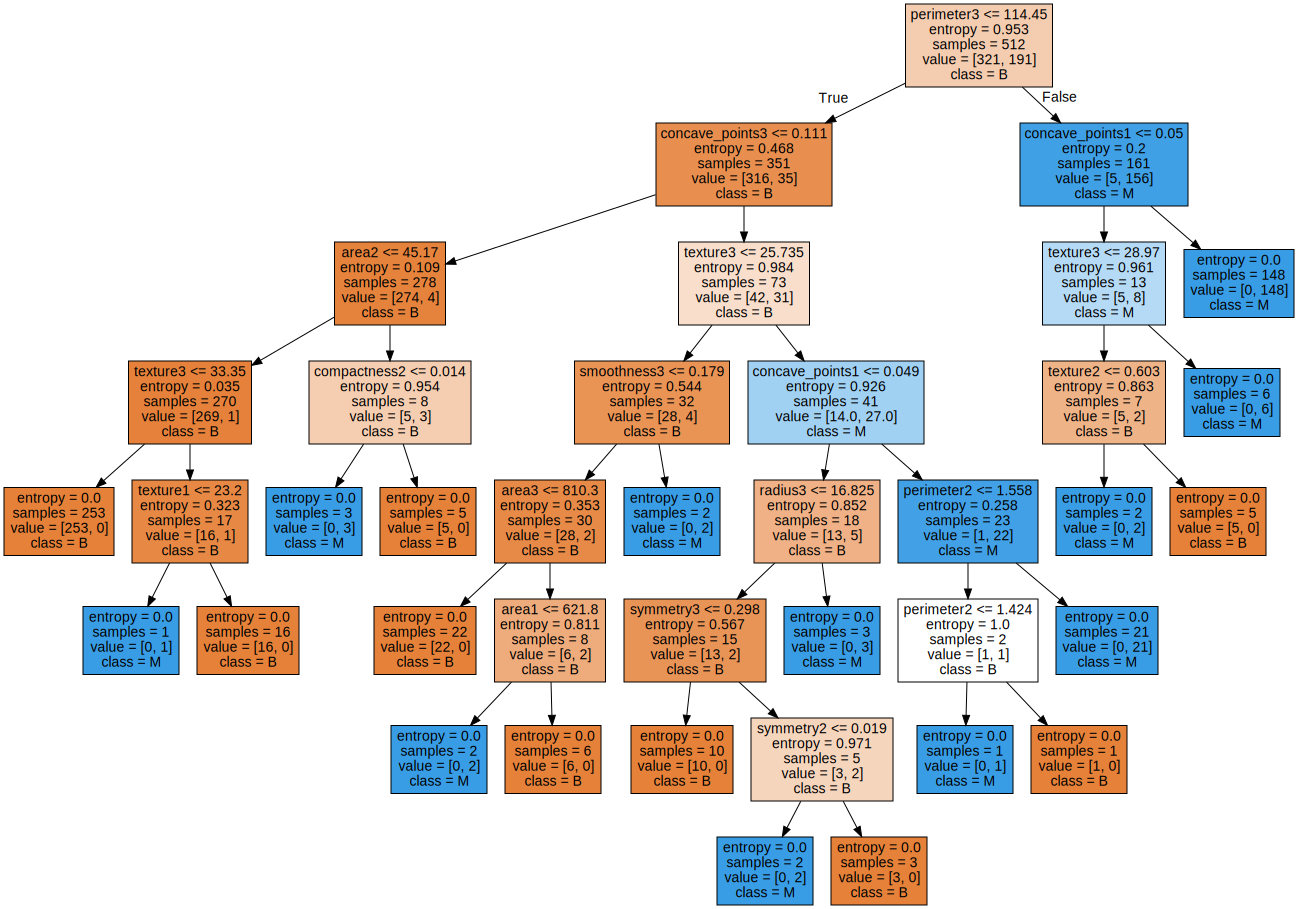

In [ ]:
i=3
classifiers.extend(build_and_visualize_decision_trees([splits[i]], [proportions[i]]))

## 2.3 Evaluating the decision tree classifiers

Classification Report for  {'40/60'}  Split :
              precision    recall  f1-score   support

           B       0.91      0.96      0.93       215
           M       0.92      0.83      0.88       127

    accuracy                           0.91       342
   macro avg       0.91      0.90      0.90       342
weighted avg       0.91      0.91      0.91       342

[[206   9]
 [ 21 106]]


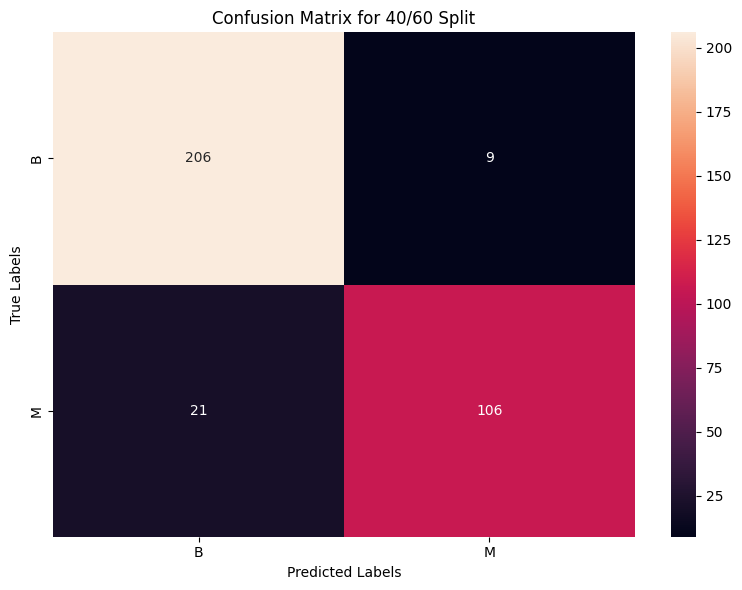




Classification Report for  {'60/40'}  Split :
              precision    recall  f1-score   support

           B       0.94      0.96      0.95       143
           M       0.93      0.91      0.92        85

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.93       228
weighted avg       0.94      0.94      0.94       228

[[137   6]
 [  8  77]]


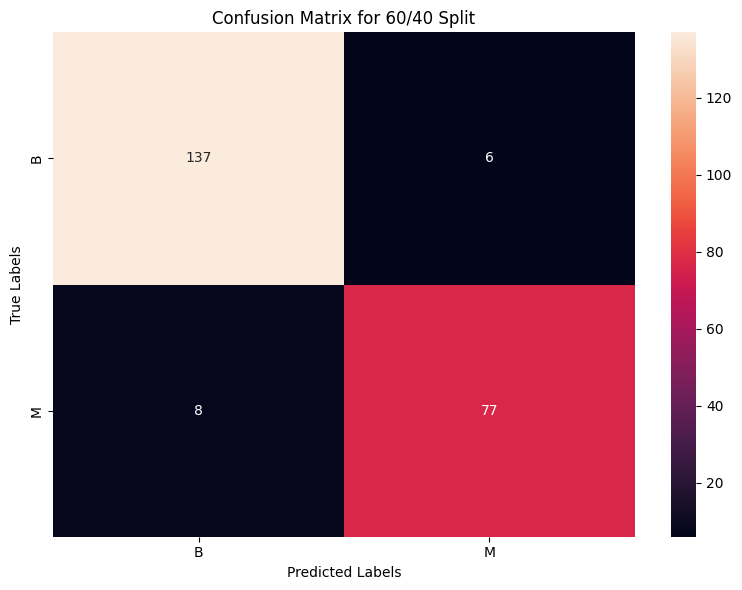




Classification Report for  {'80/20'}  Split :
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[71  1]
 [ 4 38]]


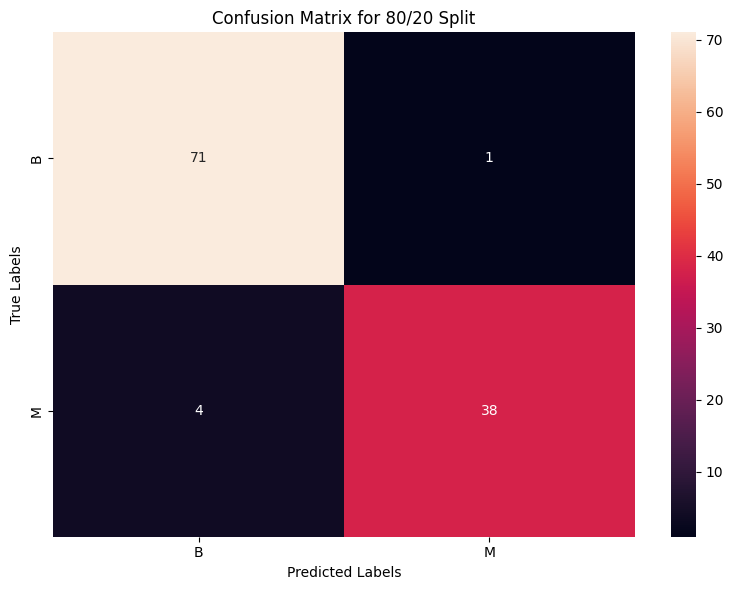




Classification Report for  {'90/10'}  Split :
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        36
           M       0.95      0.90      0.93        21

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57

[[35  1]
 [ 2 19]]


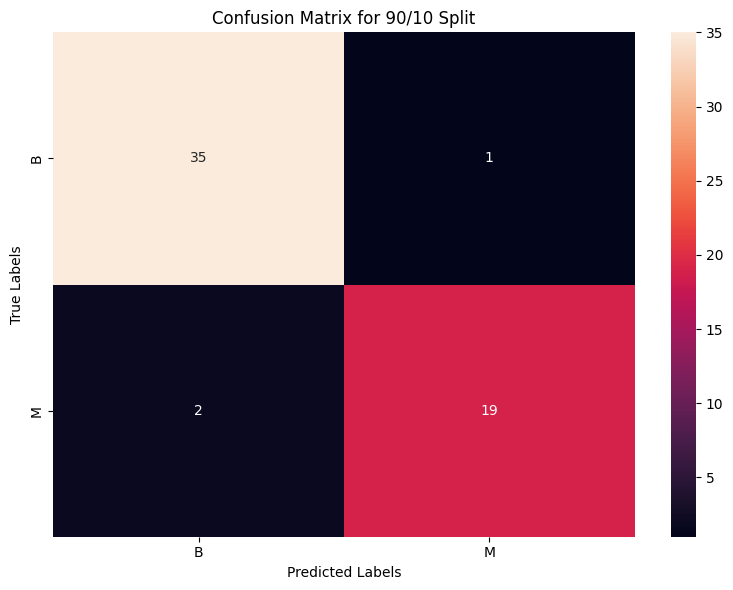

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(conf_matrix, class_names, title="Confusion Matrix"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()

def evaluate_classifiers(classifiers, proportions, class_names):
    results = []
    for i, (clf, X_train, X_test, y_train, y_test) in enumerate(classifiers):
        proportion = proportions[i]
        y_pred = clf.predict(X_test)

        # Classification report and confusion matrix
        class_report = classification_report(y_test, y_pred, target_names=class_names)
        conf_matrix = confusion_matrix(y_test, y_pred)

        results.append((proportion, class_report, conf_matrix))
        print("Classification Report for ",{proportion}," Split :")
        print(class_report)

        print(conf_matrix)

        # Visualize confusion matrix
        plot_confusion_matrix(conf_matrix, class_names, title=f"Confusion Matrix for {proportion} Split")


        print()
        print()
        print()
    return results


evaluation_results = evaluate_classifiers(classifiers, proportions, ['B','M'])


## 2.4 The depth and accuracy of a decision tree of the 80/20 dataset

### Summary

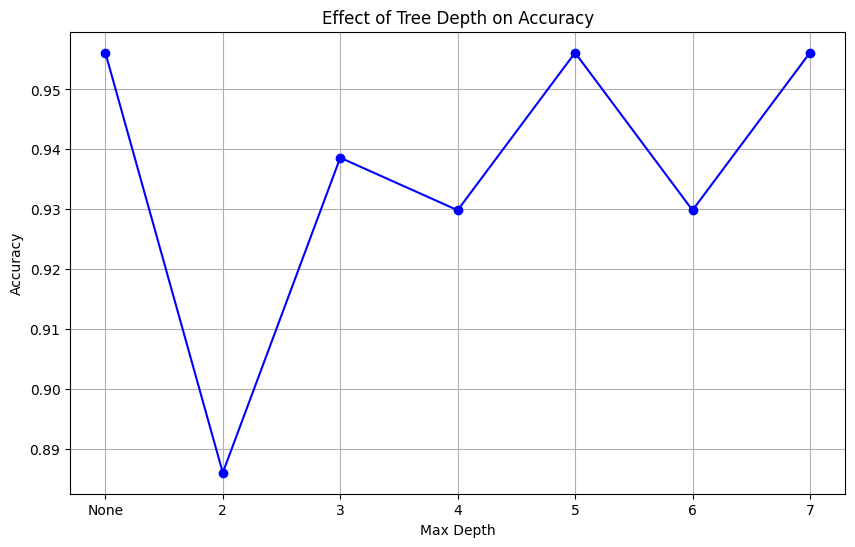

[0.956140350877193, 0.8859649122807017, 0.9385964912280702, 0.9298245614035088, 0.956140350877193, 0.9298245614035088, 0.956140350877193]


In [ ]:
from sklearn.metrics import accuracy_score

# Task 2.4 Implementation
def evaluate_depth_effect(X_train, X_test, y_train, y_test):
    depths = [None, 2, 3, 4, 5, 6, 7]
    accuracy_results = []
    for depth in depths:
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results.append((depth, accuracy))

        # Get feature names from the training data
        feature_names = list(X_train.columns) #This line is added

        # Define class names (assuming binary classification)
        class_names = ['B', 'M'] #This line is added

        # Visualize the decision tree
        dot_data = export_graphviz(clf, feature_names=feature_names, class_names=class_names, filled=True)
        graph = graphviz.Source(dot_data)
        graph.render(f"decision_tree_depth_{depth}", format="svg", cleanup=True)
        graph.render(f"decision_tree_depth_{depth}", format="png", cleanup=True)

    # Plot accuracy vs. max_depth
    depths_labels = ["None" if d is None else str(d) for d in depths]
    accuracies = [acc[1] for acc in accuracy_results]
    plt.figure(figsize=(10, 6))
    plt.plot(depths_labels, accuracies, marker='o', linestyle='-', color='b')
    plt.title("Effect of Tree Depth on Accuracy")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

    print(accuracies)

    return accuracy_results

X_train_80, X_test_80, y_train_80, y_test_80 = splits[2]
depth_effect_results = evaluate_depth_effect(X_train_80, X_test_80, y_train_80, y_test_80)


### Result of each depth

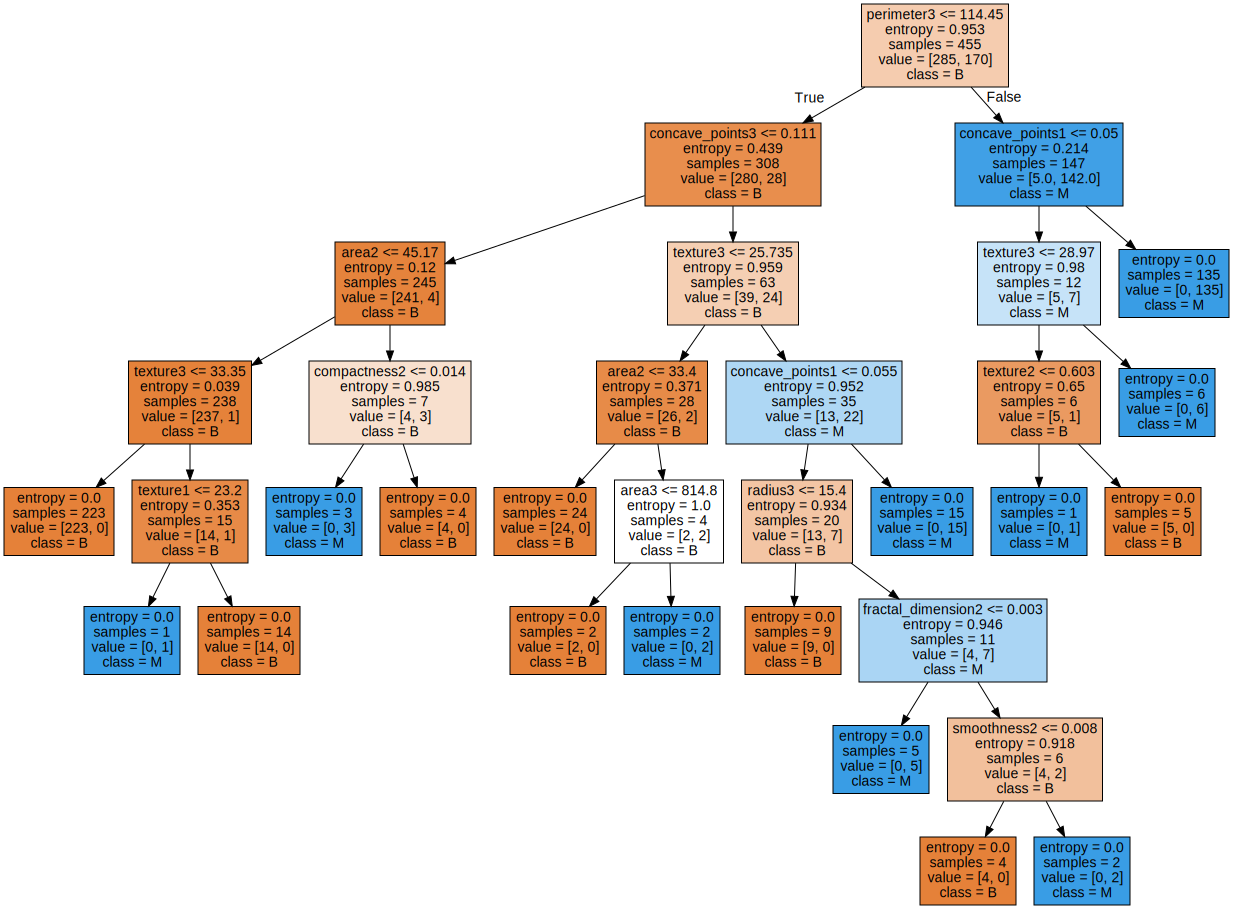

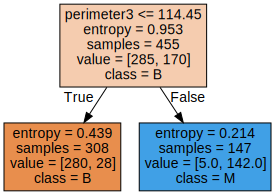

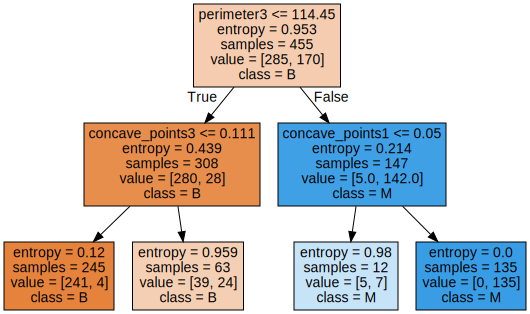

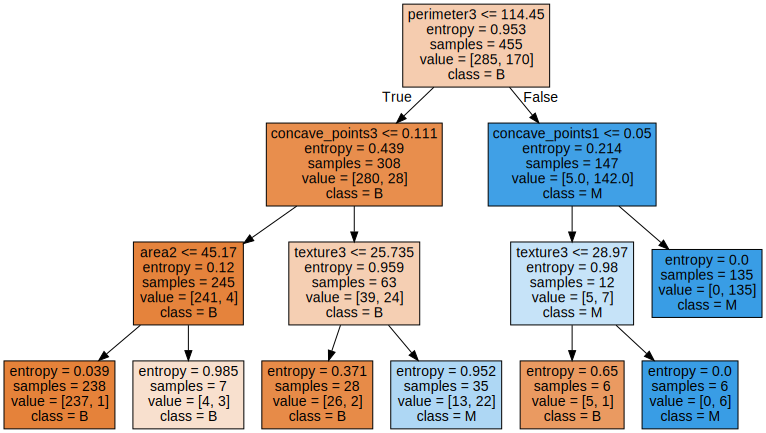

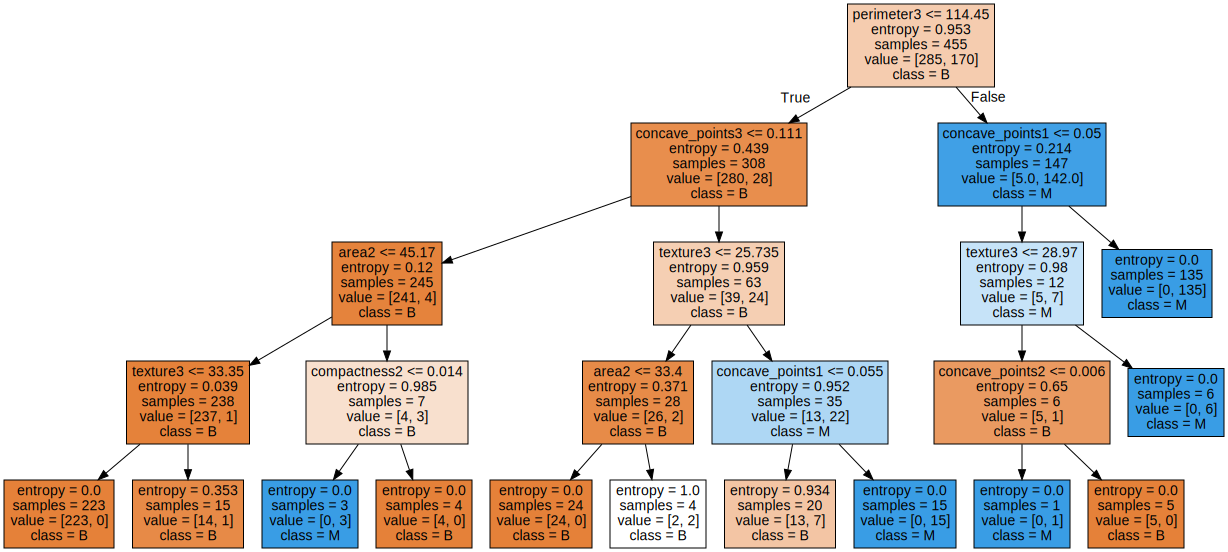

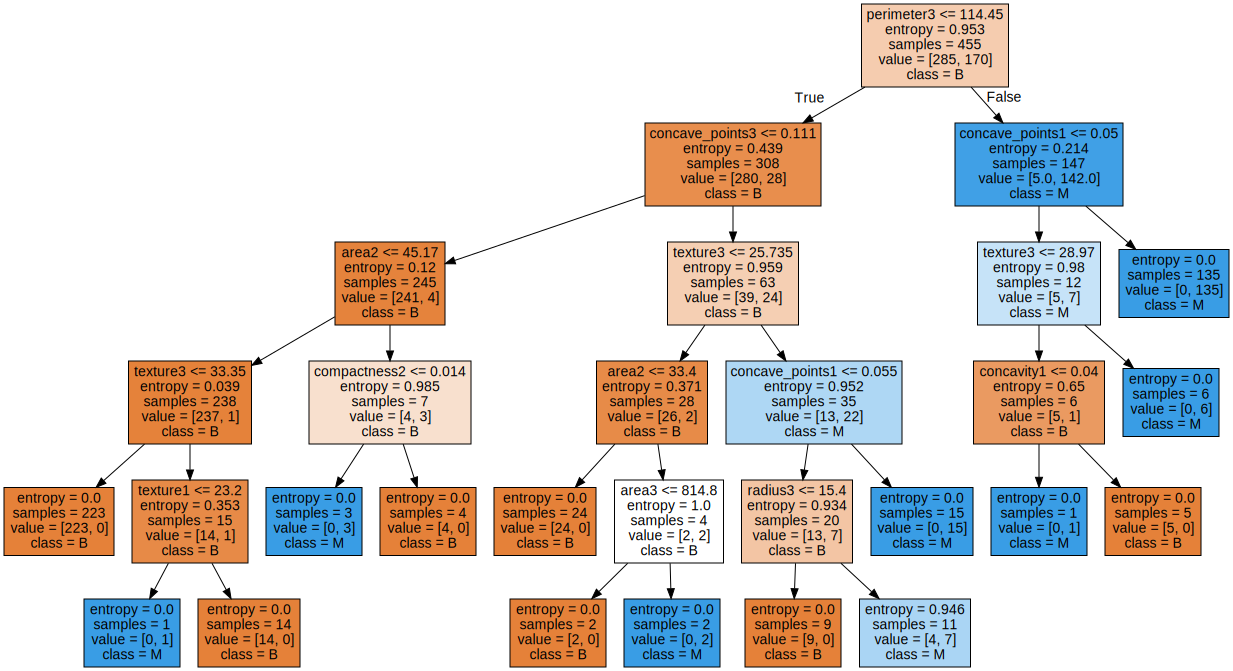

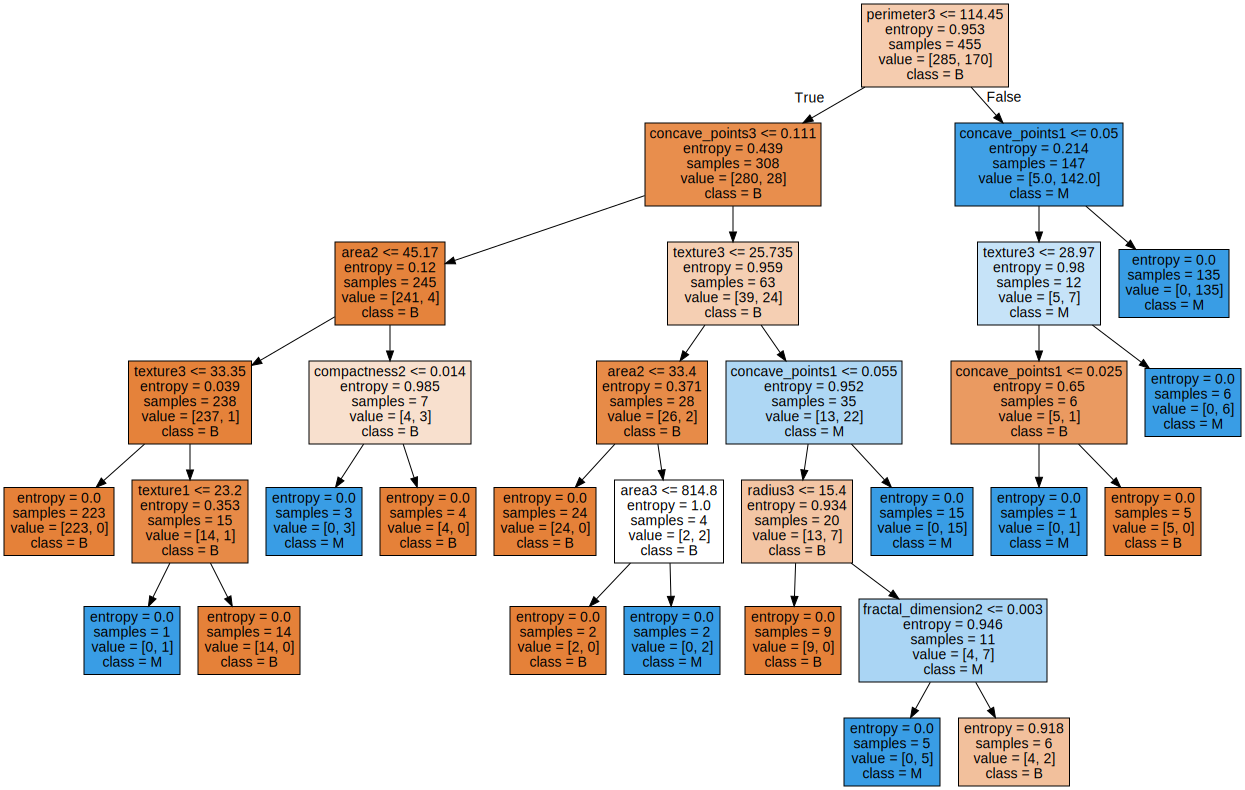

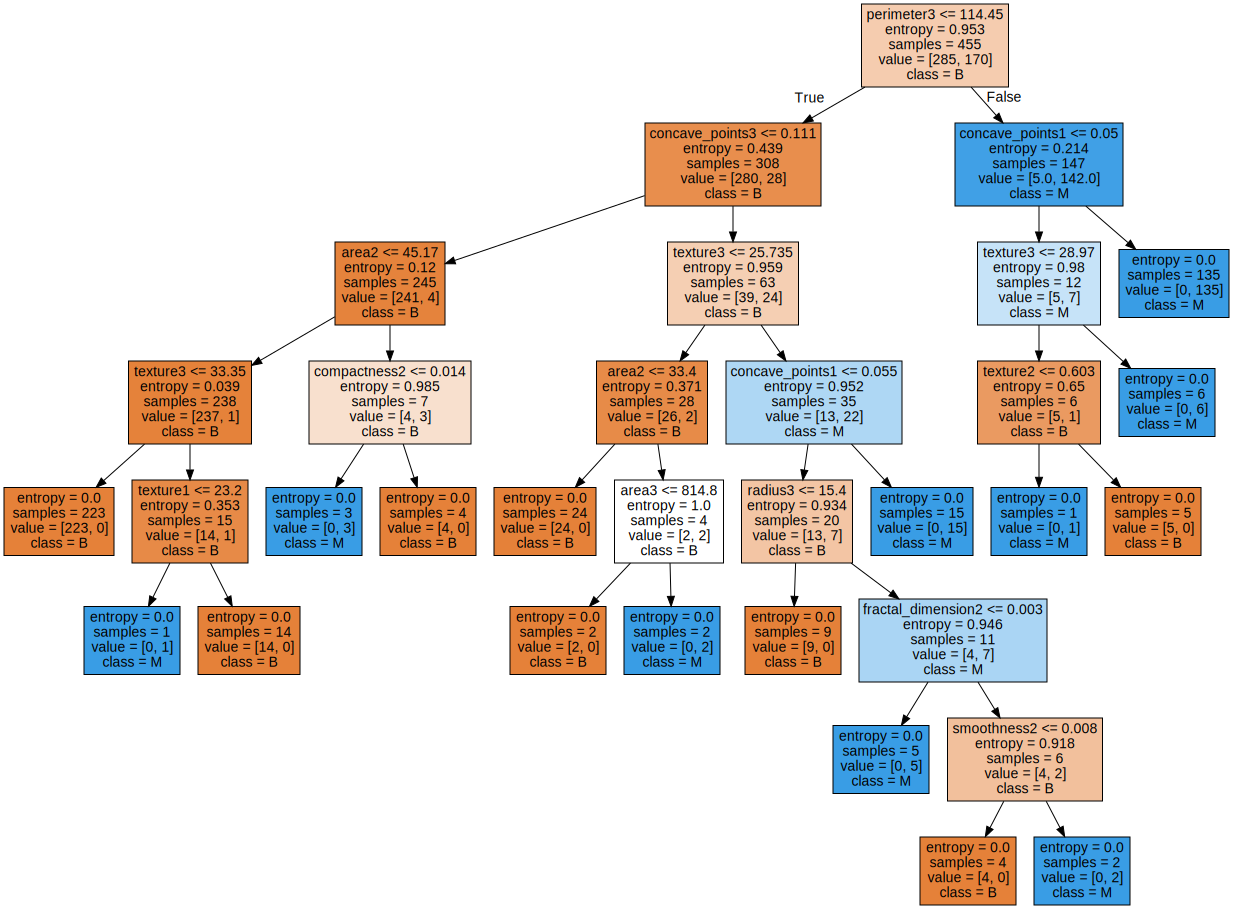

In [ ]:
from IPython.display import HTML

def build_and_visualize_decision_trees_with_depth(splits, proportions, max_depth=None):
    classifiers = []
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
        proportion = proportions[i]
        clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=max_depth)
        clf.fit(X_train, y_train)
        classifiers.append((clf, X_train, X_test, y_train, y_test))

        # Get feature names from the training data
        feature_names = list(X_train.columns)

        # Define class names (assuming binary classification)
        class_names = ['B', 'M']

        # Visualize the decision tree
        dot_data = export_graphviz(
            clf,
            feature_names=feature_names,
            class_names=class_names,
            filled=True
        )
        graph = graphviz.Source(dot_data)

        # Render inline in Jupyter Notebook with figure name
        figure_name = f"Decision tree for the {proportions[i]} datasets of depth {max_depth}"
        display(HTML(f"<h1 style='text-align: center; padding: 30px'>{figure_name}</h1>"))
        display(graph)  # Added figure_name for display

    return classifiers

build_and_visualize_decision_trees_with_depth([splits[2]], [proportions[2]],)

for i in range(1,8):
  build_and_visualize_decision_trees_with_depth([splits[2]], [proportions[2]], i)

## 2.5 The depth and accuracy of a decision tree of the other dataset

### 40/60 dataset

#### Summary

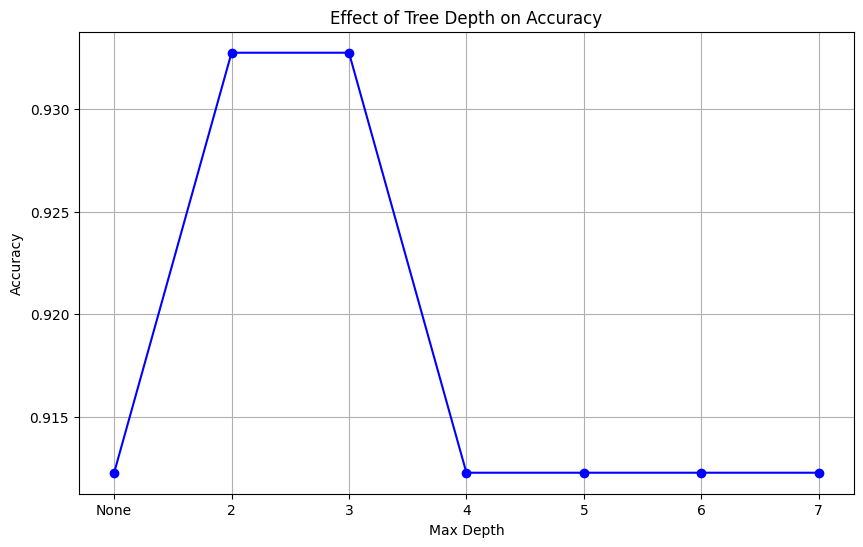

[0.9122807017543859, 0.9327485380116959, 0.9327485380116959, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859]


In [ ]:
from sklearn.metrics import accuracy_score

X_train_80, X_test_80, y_train_80, y_test_80 = splits[0]
depth_effect_results = evaluate_depth_effect(X_train_80, X_test_80, y_train_80, y_test_80)


#### Result of each depth

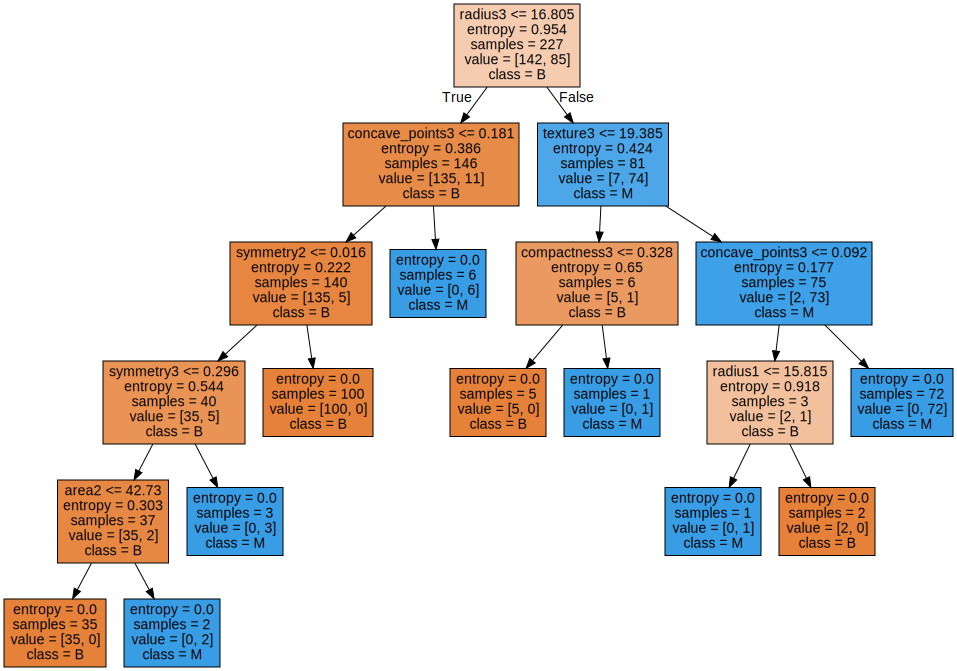

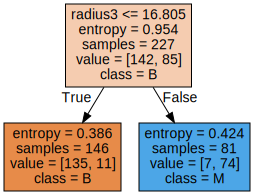

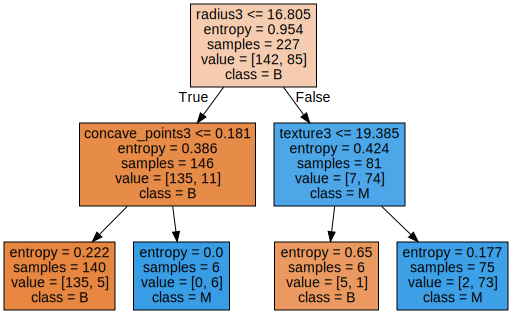

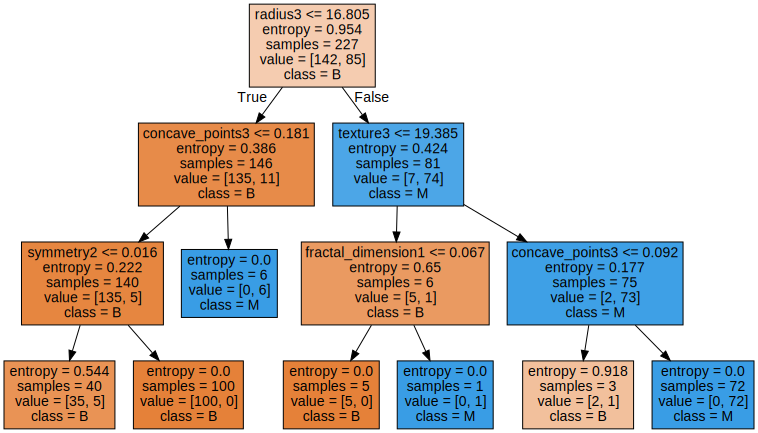

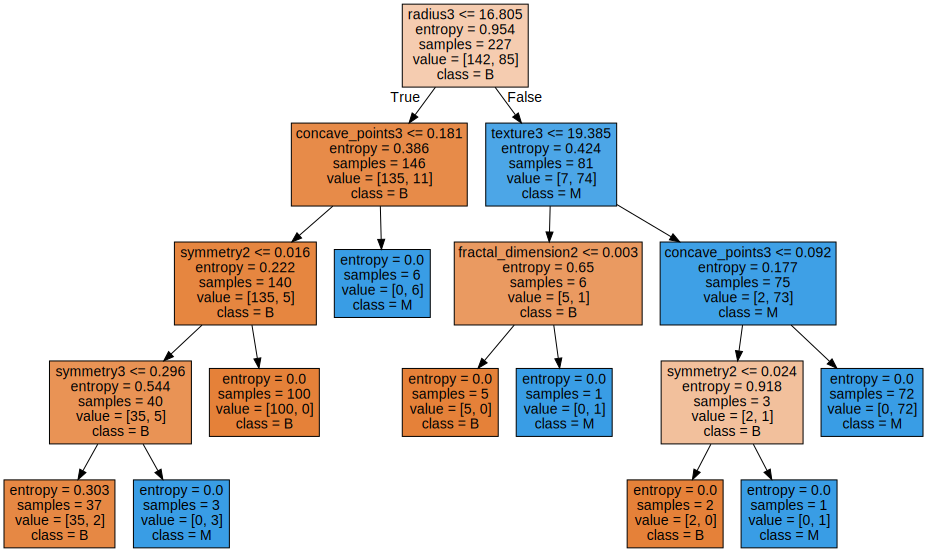

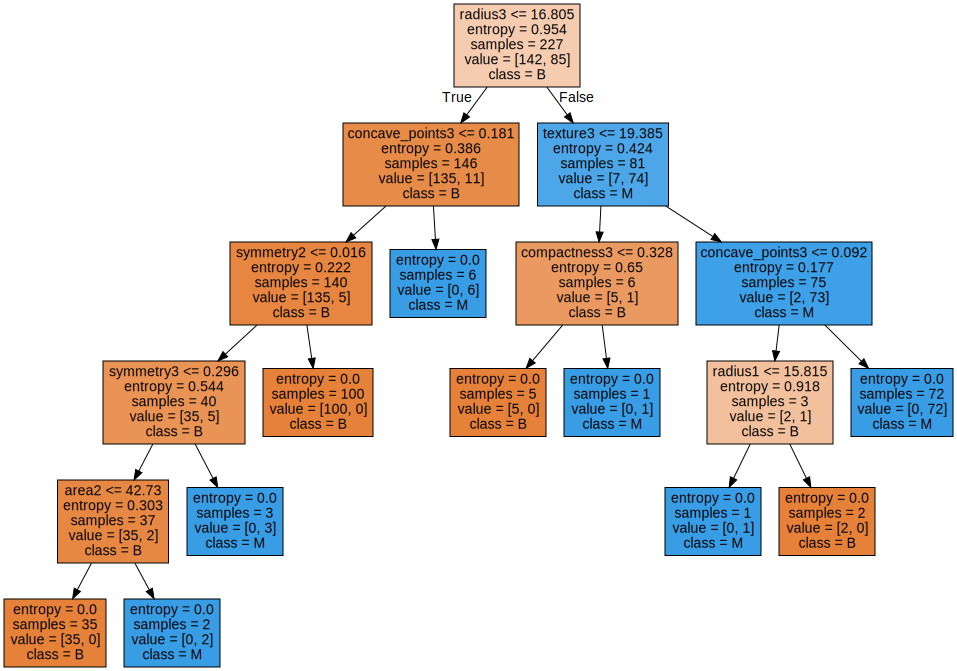

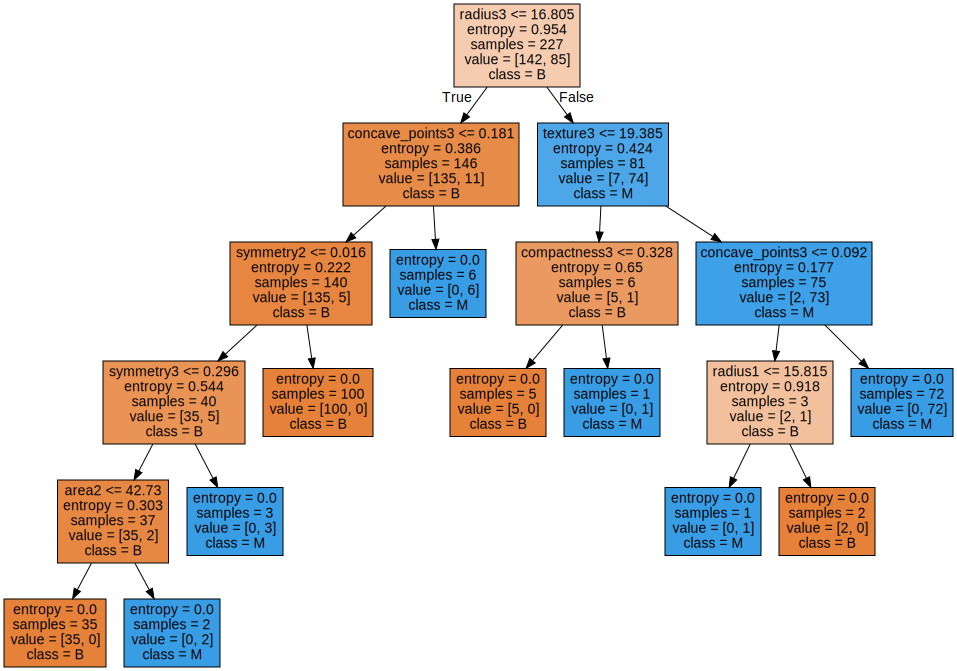

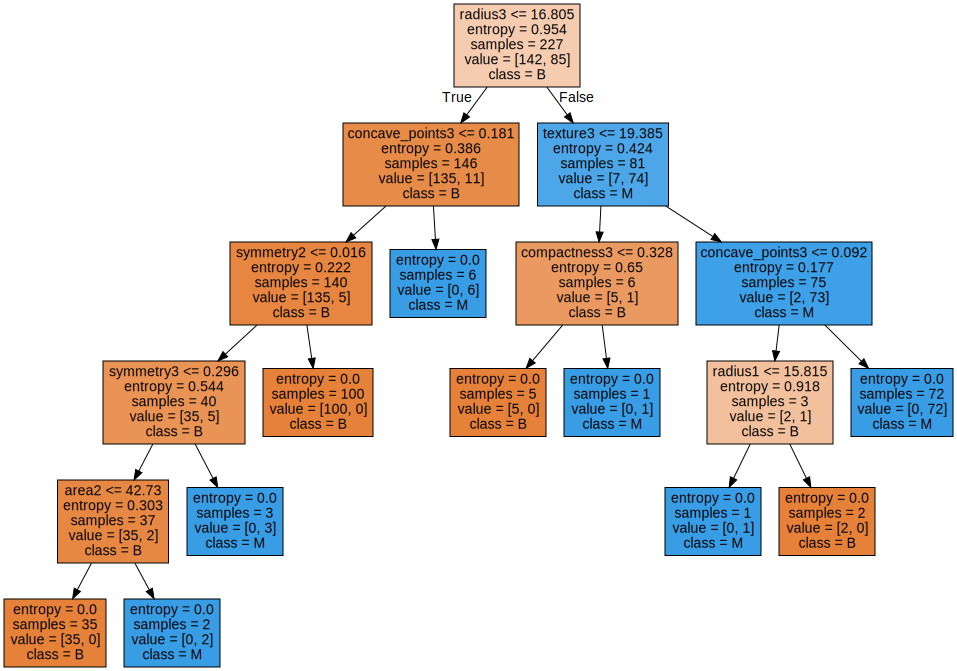

In [ ]:
build_and_visualize_decision_trees_with_depth([splits[0]], [proportions[0]],)

for i in range(1,8):
  build_and_visualize_decision_trees_with_depth([splits[0]], [proportions[0]], i)

### 60/40 dataset

#### Summary

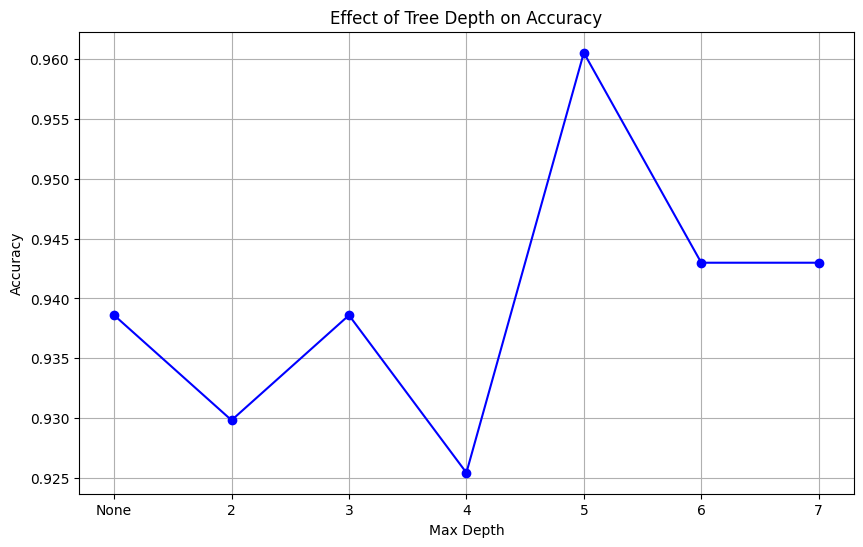

[0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9254385964912281, 0.9605263157894737, 0.9429824561403509, 0.9429824561403509]


In [ ]:
X_train_80, X_test_80, y_train_80, y_test_80 = splits[1]
depth_effect_results = evaluate_depth_effect(X_train_80, X_test_80, y_train_80, y_test_80)


#### Result of each depth

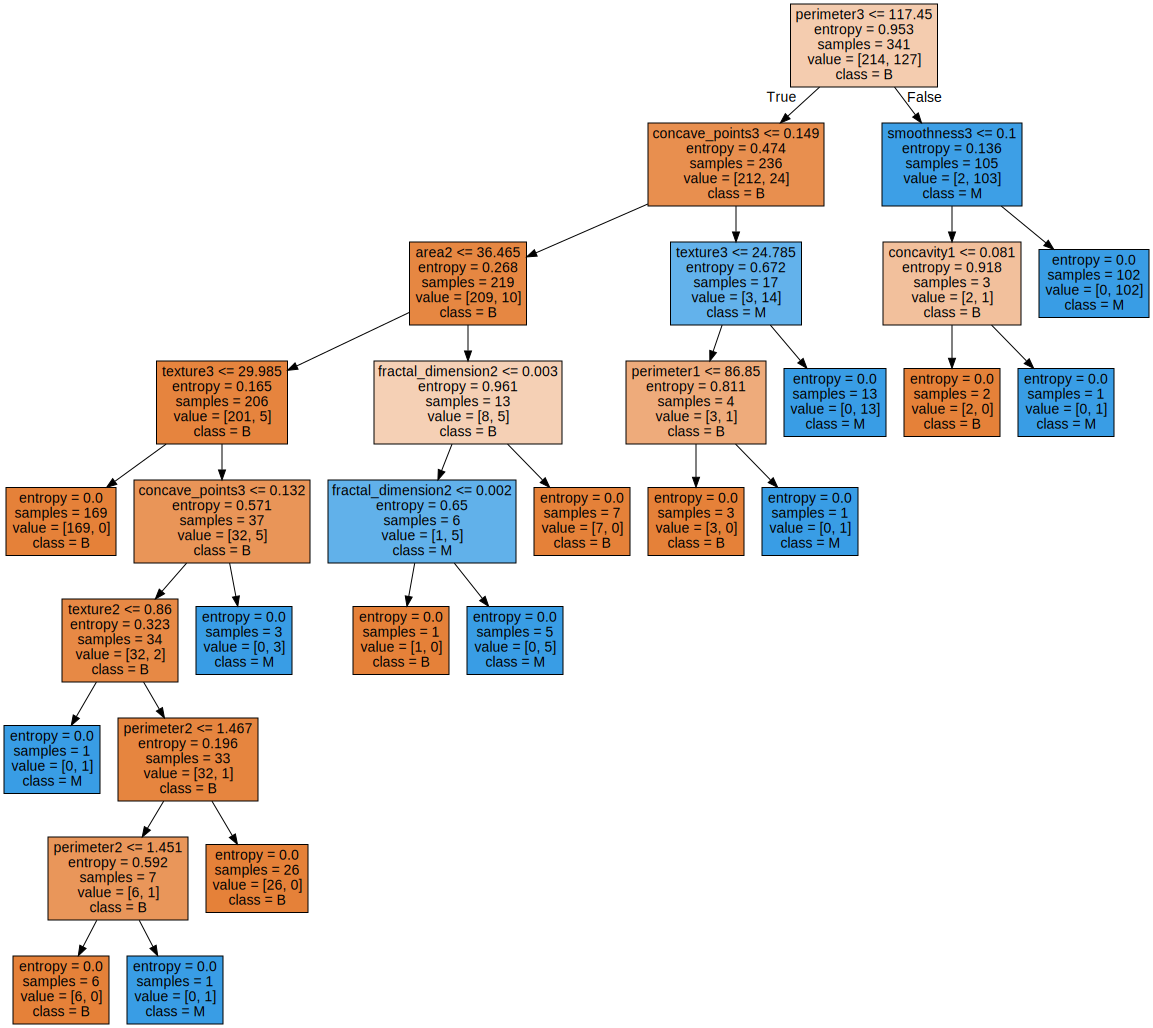

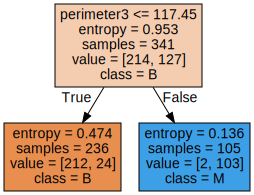

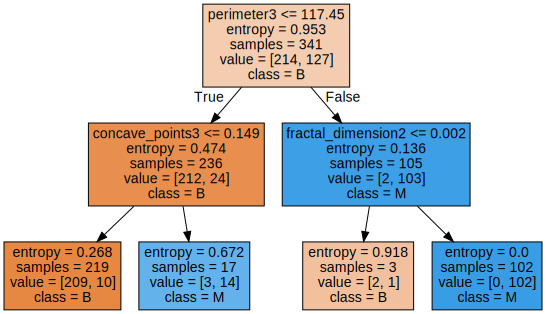

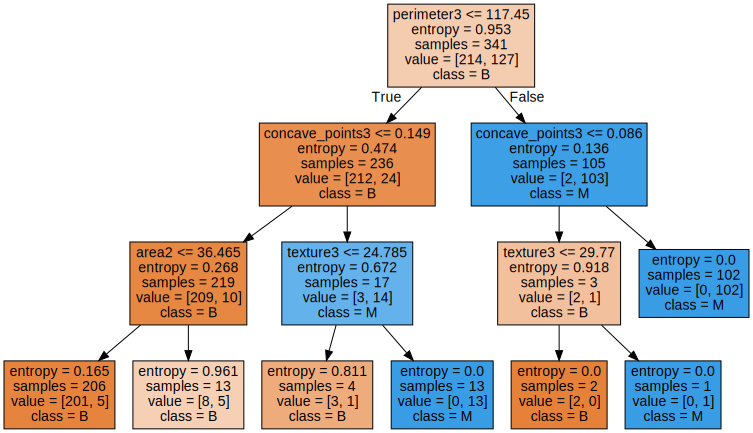

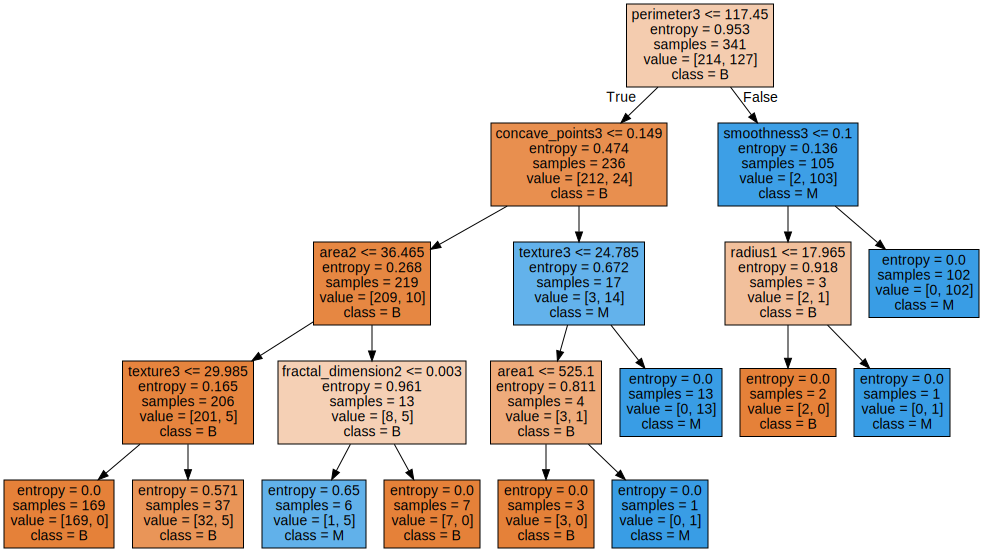

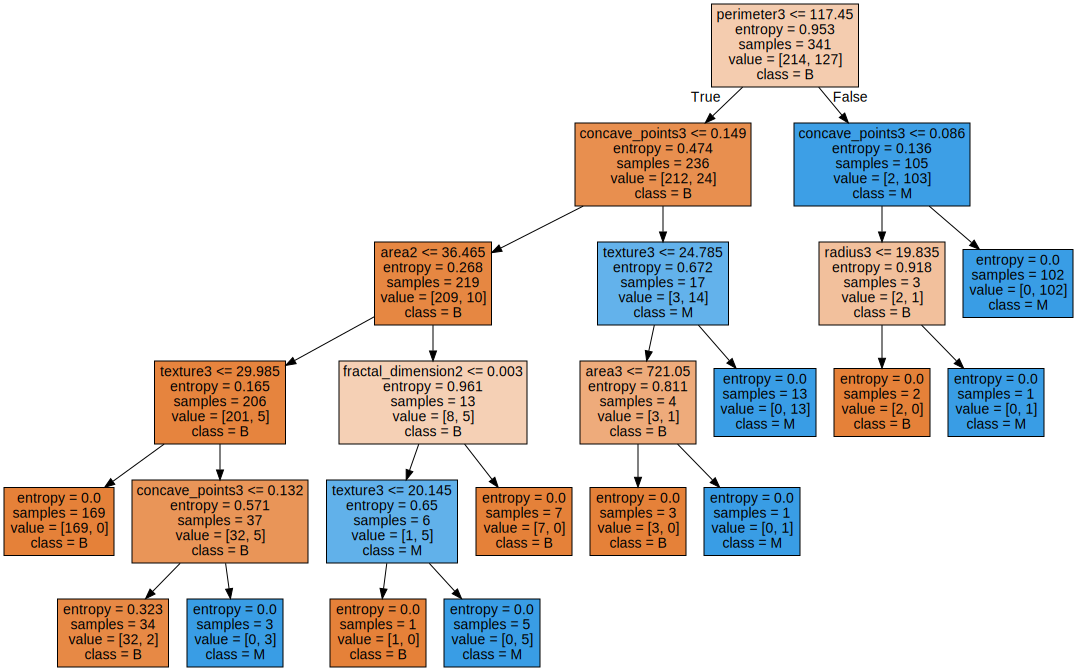

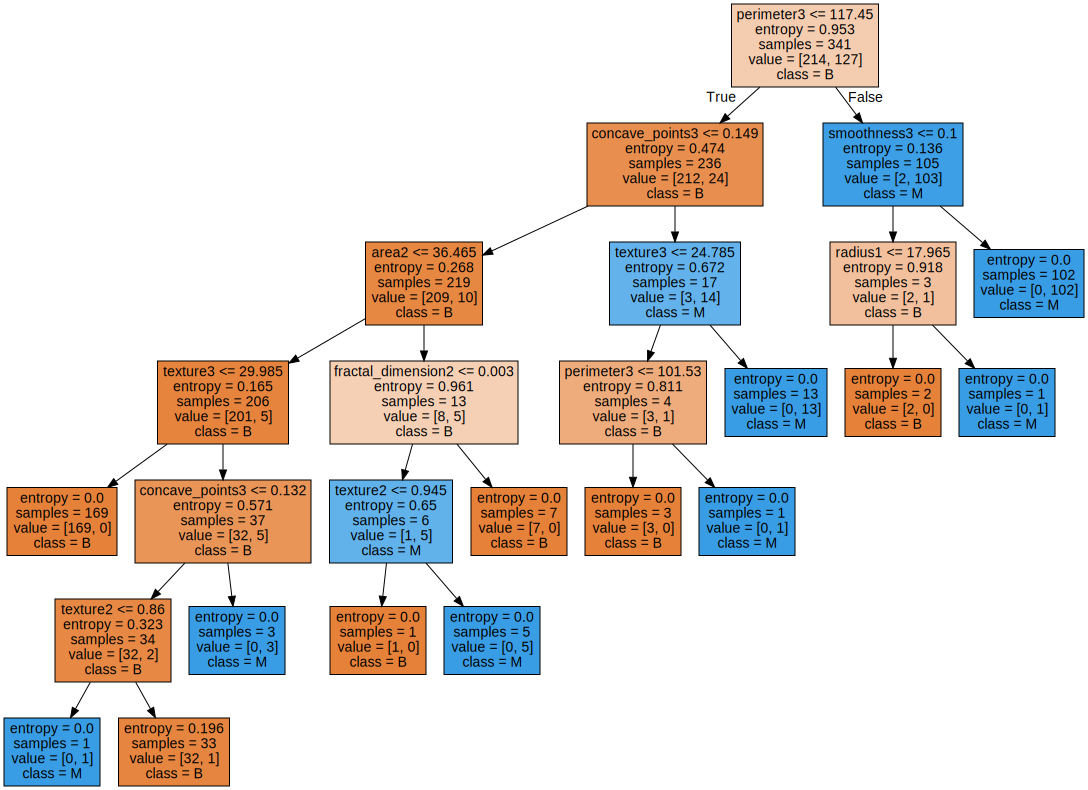

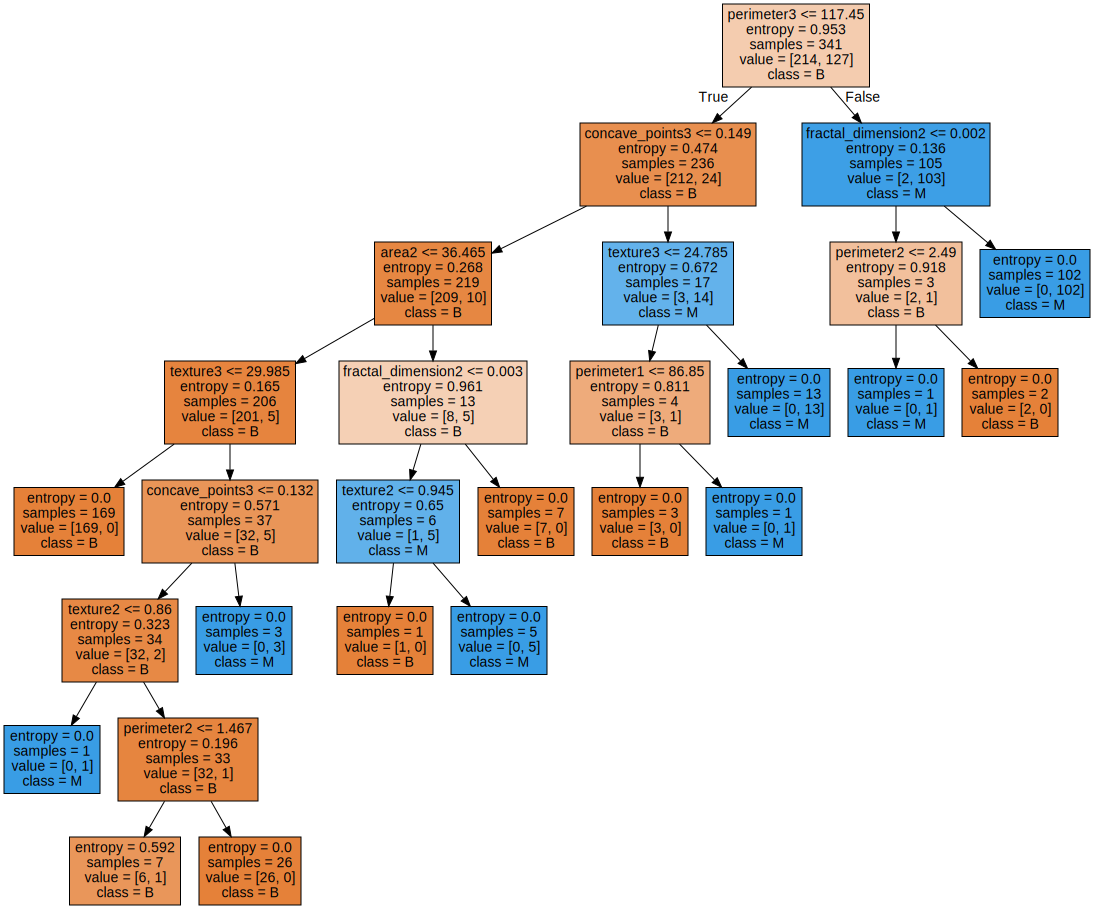

In [ ]:
build_and_visualize_decision_trees_with_depth([splits[1]], [proportions[0]],)

for i in range(1,8):
  build_and_visualize_decision_trees_with_depth([splits[1]], [proportions[0]], i)

### 90/10 dataset

#### Summary

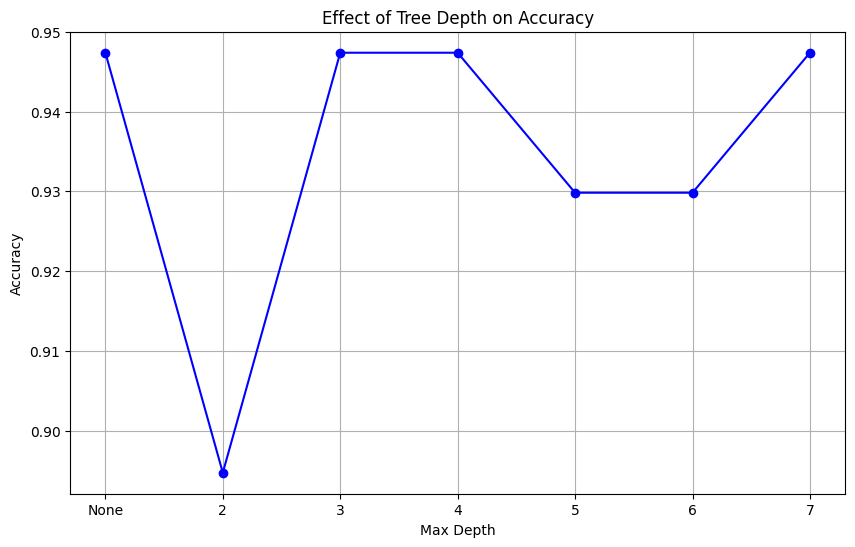

[0.9473684210526315, 0.8947368421052632, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9298245614035088, 0.9473684210526315]


In [ ]:
X_train_80, X_test_80, y_train_80, y_test_80 = splits[3]
depth_effect_results = evaluate_depth_effect(X_train_80, X_test_80, y_train_80, y_test_80)


#### Result of each depth

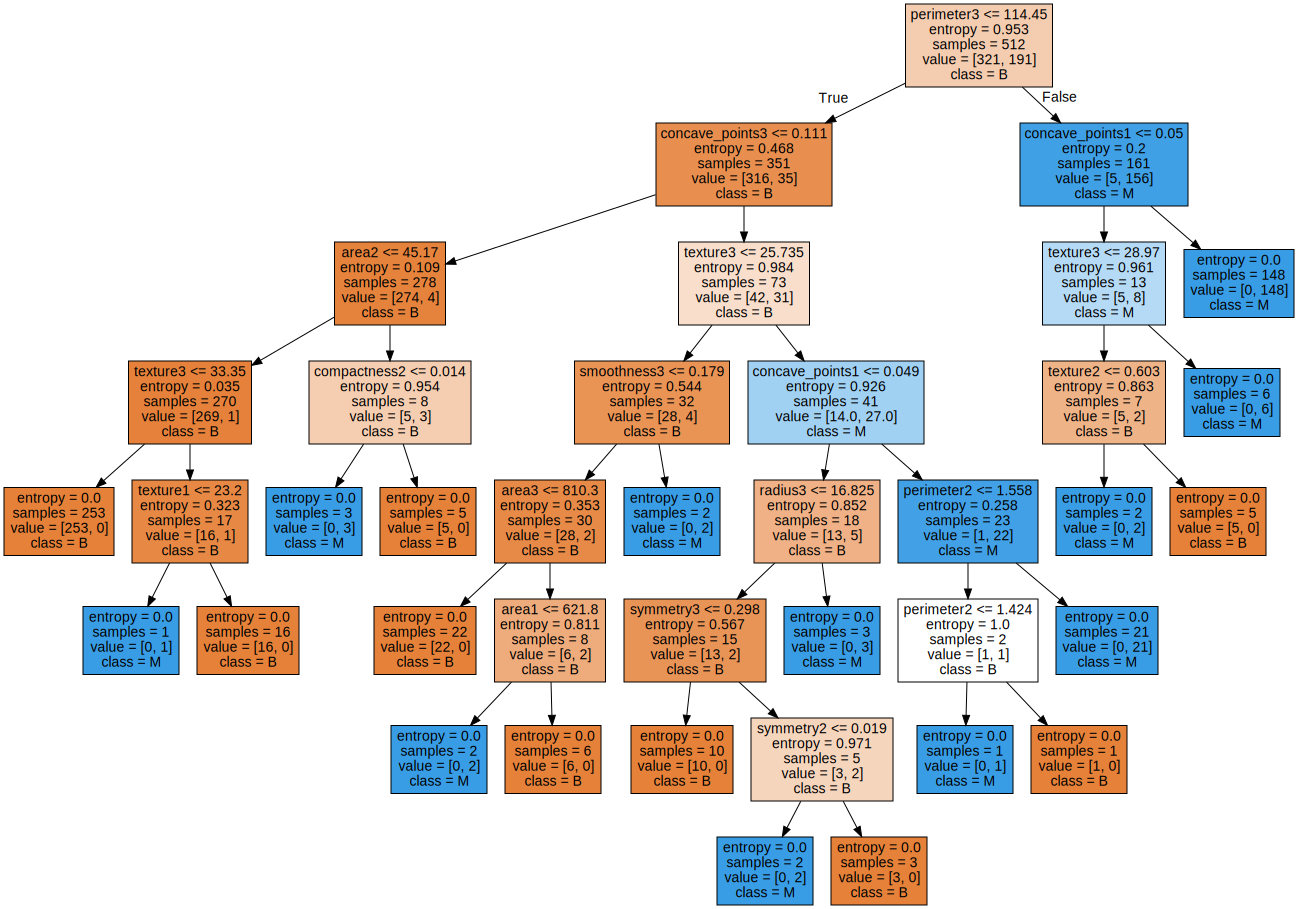

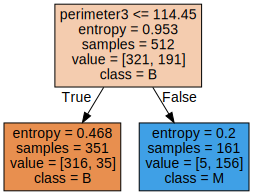

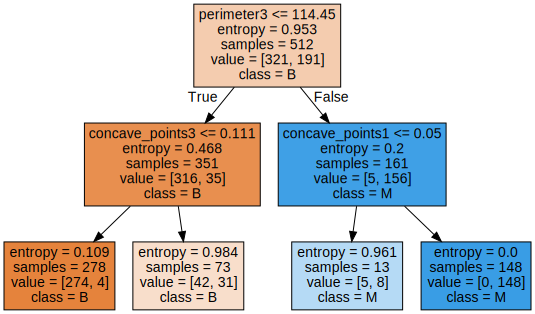

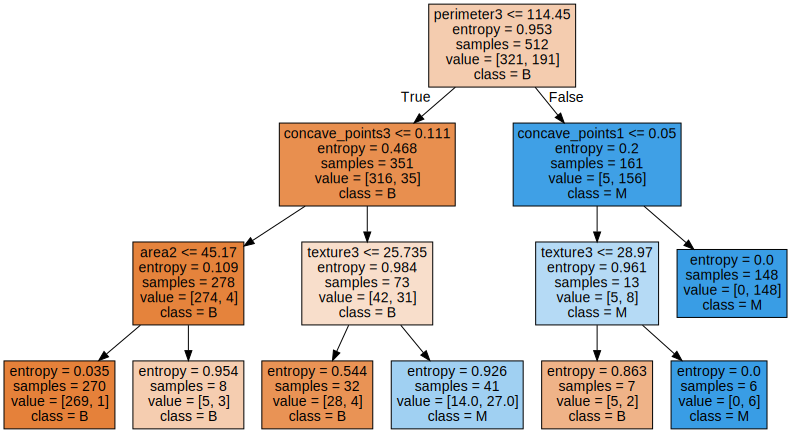

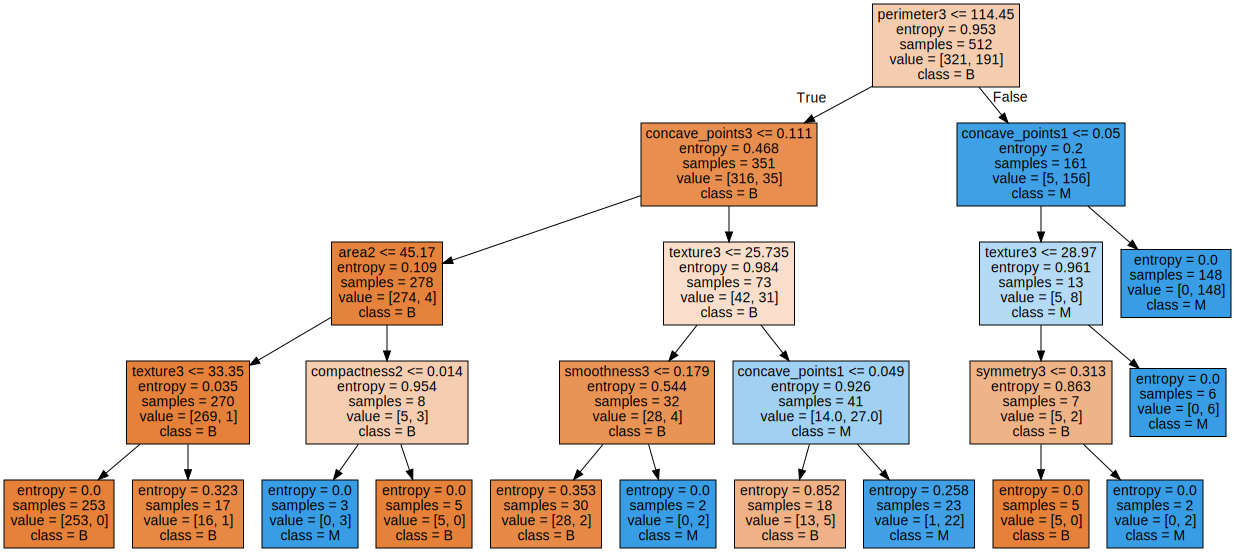

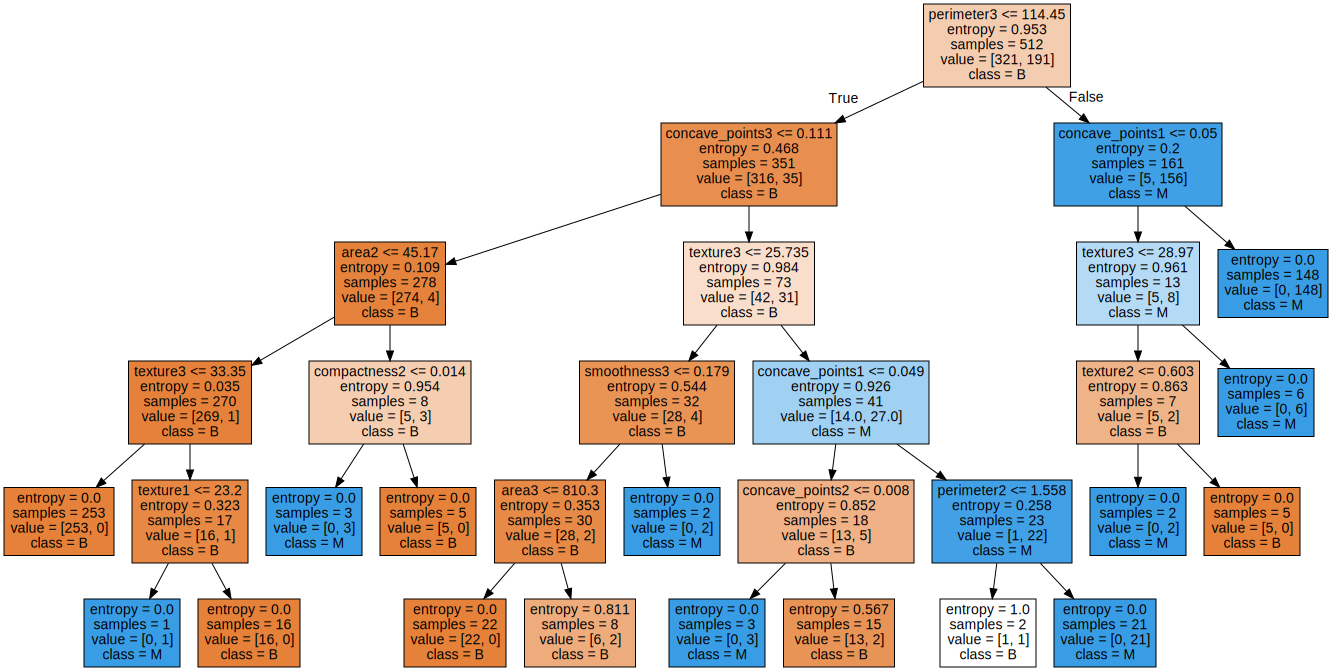

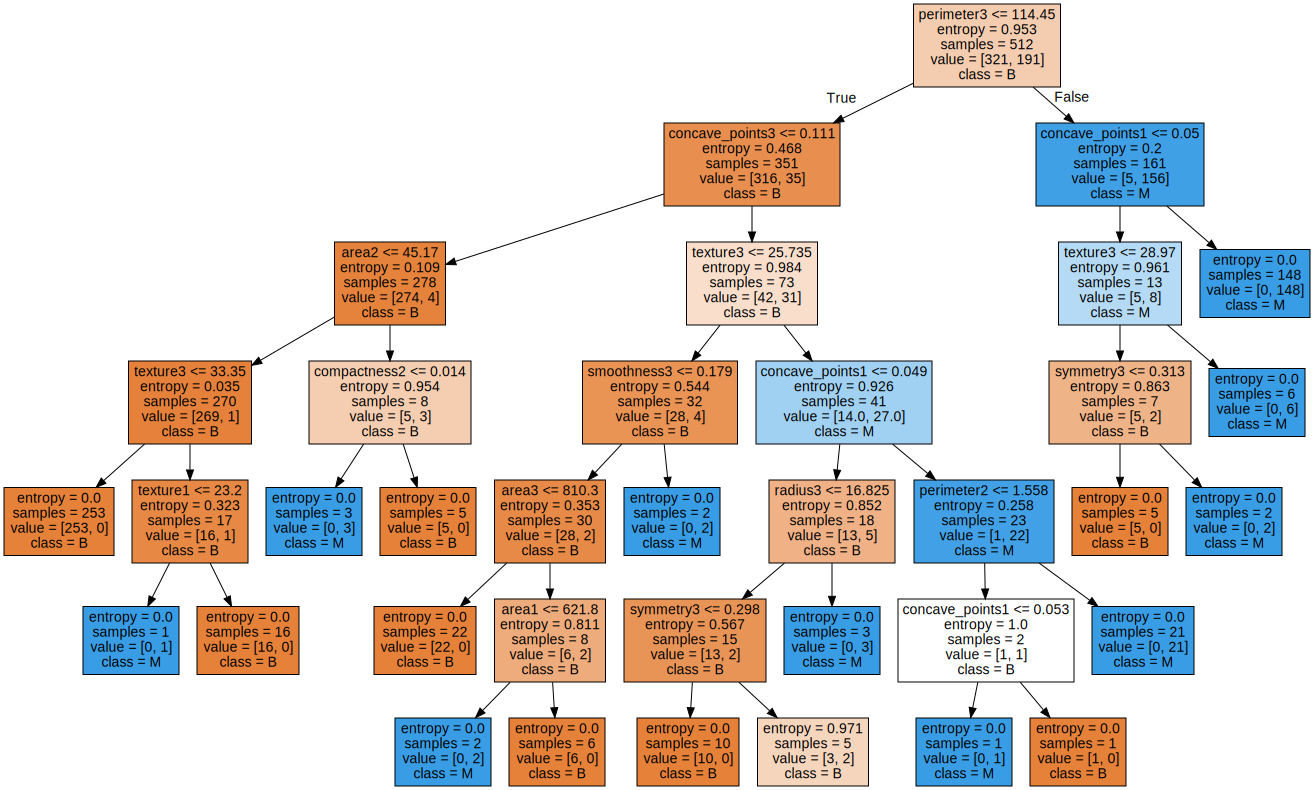

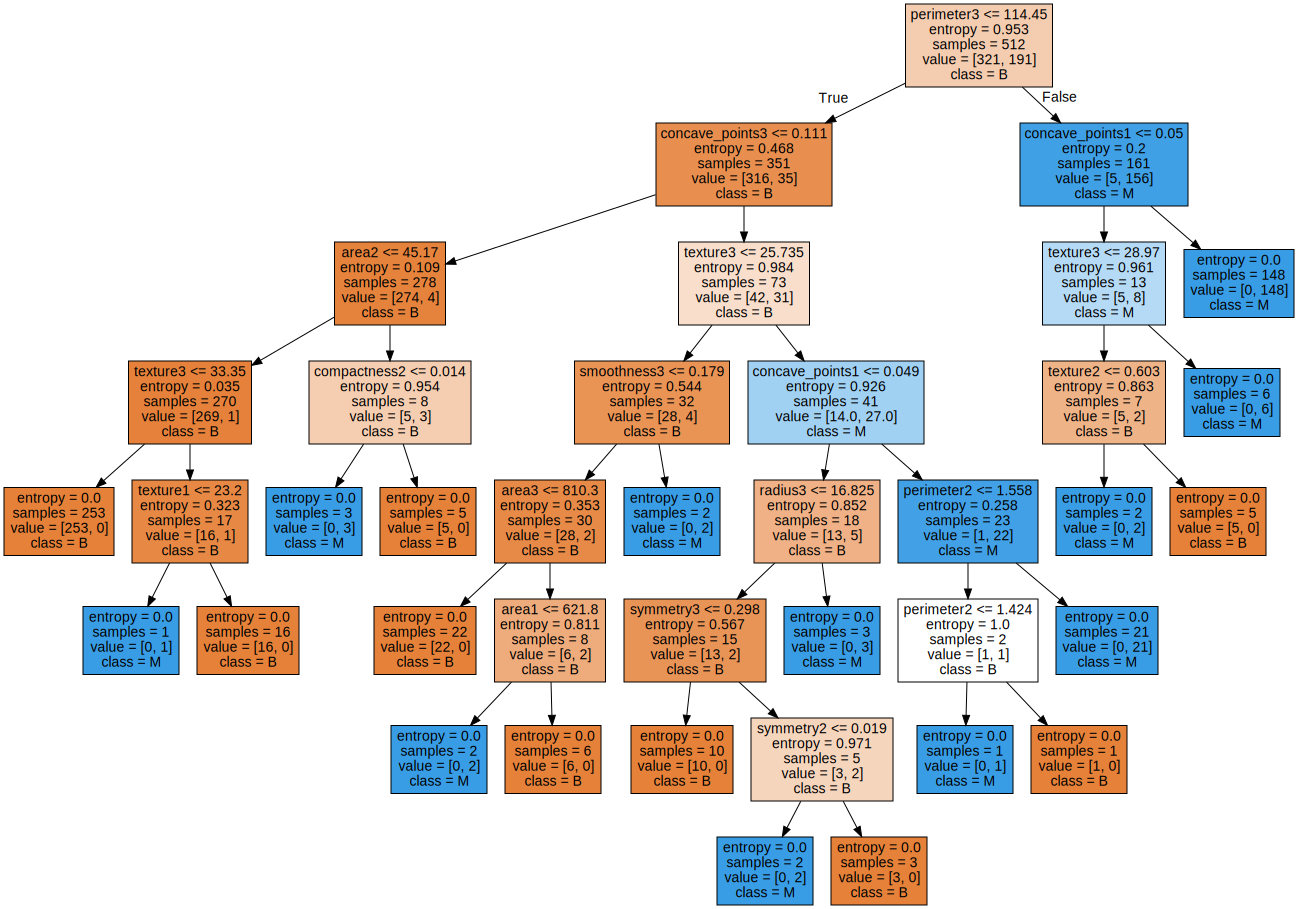

In [ ]:
from IPython.display import HTML

def build_and_visualize_decision_trees_with_depth(splits, proportions, max_depth=None):
    classifiers = []
    for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
        proportion = proportions[i]
        clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=max_depth)
        clf.fit(X_train, y_train)
        classifiers.append((clf, X_train, X_test, y_train, y_test))

        # Get feature names from the training data
        feature_names = list(X_train.columns)

        # Define class names (assuming binary classification)
        class_names = ['B', 'M']

        # Visualize the decision tree
        dot_data = export_graphviz(
            clf,
            feature_names=feature_names,
            class_names=class_names,
            filled=True
        )
        graph = graphviz.Source(dot_data)

        # Render inline in Jupyter Notebook with figure name
        figure_name = f"Decision tree for the {proportions[i]} datasets of depth {max_depth}"
        display(HTML(f"<h1 style='text-align: center; padding: 30px'>{figure_name}</h1>"))
        display(graph)  # Added figure_name for display

    return classifiers

build_and_visualize_decision_trees_with_depth([splits[3]], [proportions[3]],)

for i in range(1,8):
  build_and_visualize_decision_trees_with_depth([splits[3]], [proportions[3]], i)

## Note: Run this in case the archive.ics server is down.

In [ ]:
# Replace the link with your shared link
shared_link = "https://drive.google.com/file/d/1VWs0YrhC0_P3s0yW1Jj2cet_YVAdqJbb/view?usp=sharing"

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]

# Construct the direct download link
download_link = f"https://drive.google.com/uc?id={file_id}&export=download"

# Download the file
!wget -O file.zip "$download_link"

# Extract the ZIP file (if needed)
import zipfile

with zipfile.ZipFile("file.zip", 'r') as zip_ref:
    zip_ref.extractall()

--2024-12-15 13:27:22--  https://drive.google.com/uc?id=1VWs0YrhC0_P3s0yW1Jj2cet_YVAdqJbb&export=download
Resolving drive.google.com (drive.google.com)... 74.125.126.139, 74.125.126.138, 74.125.126.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.126.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1VWs0YrhC0_P3s0yW1Jj2cet_YVAdqJbb&export=download [following]
--2024-12-15 13:27:22--  https://drive.usercontent.google.com/download?id=1VWs0YrhC0_P3s0yW1Jj2cet_YVAdqJbb&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.69.132, 2607:f8b0:4001:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.69.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49796 (49K) [application/octet-stream]
Saving to: ‘file.zip’

file.zip            100%[===================>]  48.63K  --.-KB/s    in 0.00

In [ ]:
import pandas as pd
data = pd.read_csv('/content/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
features = data.drop(columns=['id', 'diagnosis'])

features.head()

labels = data['diagnosis']

labels.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M
